# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 total observations, with 2 null values in gre and gpa columns, and 1 null value in the prestige column. 

#### Question 2. Create a summary table

In [10]:
df_raw.describe()
#checking summary statistics again once null values are dropped
df_raw2.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because the range of GRE (from 220 as the minimum and 800 as the maximum) is greater than that of GPA (from 1.0 to 4.0). 

#### Question 4. Drop data points with missing data


In [5]:
df_raw2 = df_raw.dropna(axis=0)

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: run the code below to check the number of null values that are left in the dataframe. 

In [6]:
df_raw2.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### Question 6. Create box plots for GRE and GPA

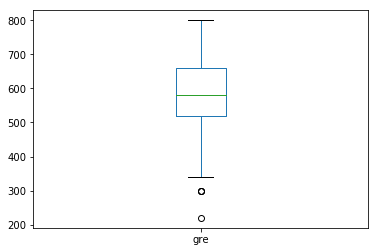

In [11]:
#boxplot 1 for GRE
df_raw2['gre'].plot.box()

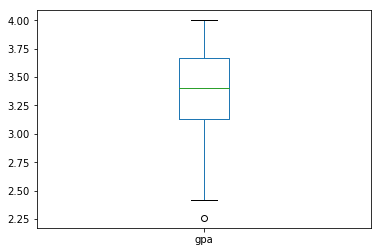

In [12]:
#boxplot 2 
df_raw2['gpa'].plot.box()

#### Question 7. What do these plots show?

Answer: These plots show the median values, indicated by the green line in the center, of each variable, which is 580 for GRE and 3.40 for GPA. The plots also show the upper and lower quartile of each variable: 660 as the upper quartile and 520 as the lower quartile for GRE, and 3.67 as the upper quartile while 3.13 as the lower quartile for GPA. 

In addition, the upper and lower whiskers (here calculated as Q3 + 1.5 x IQR for the upper one and Q1 - 1.5 x IQR for the lower one) provide a good indication on reach and distribution of variables. As we can see here, the distribution of GRE looks more "normal" than that of GPA. On the other hand, GRE has two potential outliers versus GPA's one potential outlier. 

#### Question 8. Describe each distribution 

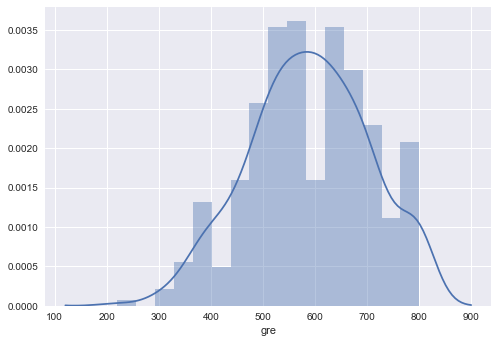

In [20]:
# plot the distribution of each variable 
import seaborn as sns
sns.distplot(df_raw2['gre'])

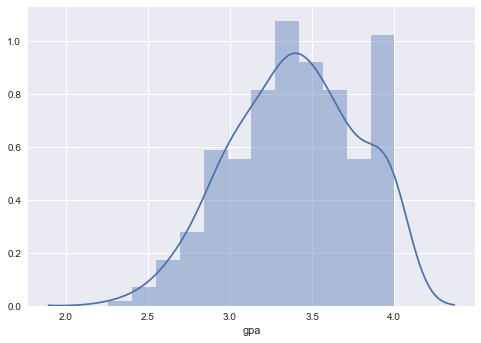

In [21]:
sns.distplot(df_raw2['gpa'])

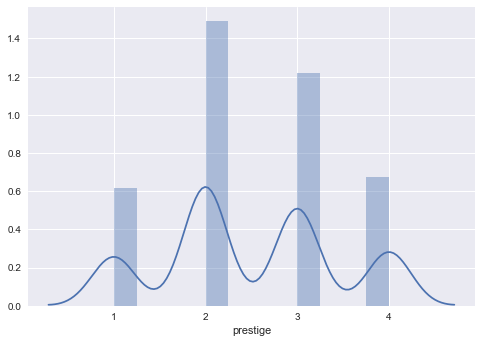

In [22]:
sns.distplot(df_raw2['prestige'])

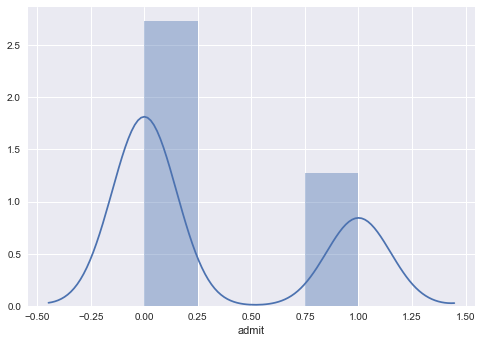

In [23]:
sns.distplot(df_raw2['admit']) #sanity check

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: If the model were to use GPA and GRE as predictors, then yes, we would meet that requirement. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: The distributions of the two variables could be adjusted to look more "normal." Methods of normalizing continuous variables involve taking the log of, raising it to the power of x, etc. (Attempts were made below.)

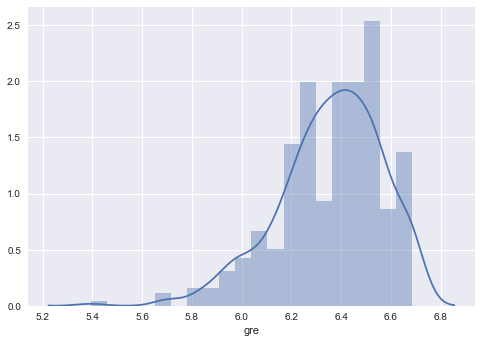

In [53]:
sns.distplot(np.log(df_raw2['gre'] * 1.0)) #didn't work well

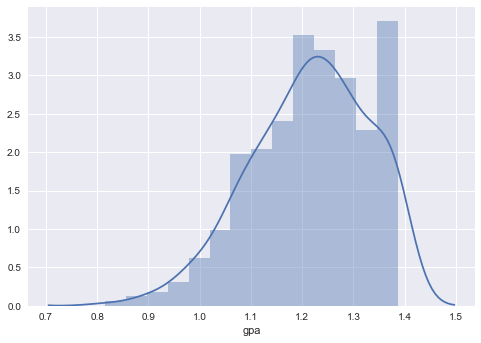

In [48]:
sns.distplot(np.log(df_raw2['gpa'] * 1.0)) #didn't work well either

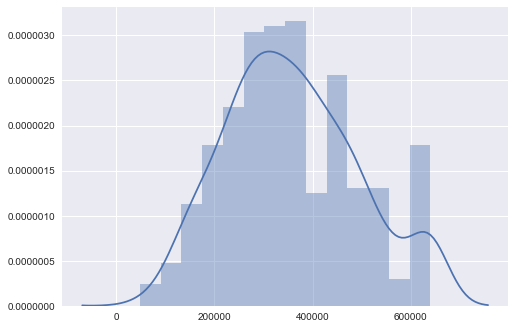

In [61]:
sns.distplot([x**2 for x in df_raw2['gre']]) # looks fine

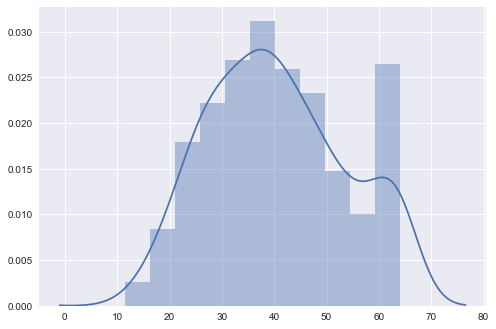

In [59]:
sns.distplot([x**3 for x in df_raw2['gpa']])

#### Question 11. Which of our variables are potentially colinear? 

In [62]:
# create a correlation matrix for the data
df_raw2.corr()

,admit,gre,gpa,prestige,gre_exp
admit,1.000000,0.181202,0.174116,-0.243563,-0.0
gre,0.181202,1.000000,0.382408,-0.124533,0.0
gpa,0.174116,0.382408,1.000000,-0.060976,0.0
prestige,-0.243563,-0.124533,-0.060976,1.000000,-0.0
gre_exp,-0.000000,0.000000,0.000000,-0.000000,NaN


#### Question 12. What did you find?

Answer: According to the correlation coefficients between different variables, it doesn't seem like we're having colinearity in our dataset. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

1. Convert the prestige column into dummy variables. The total number of variables = 4 - 1, which is 3. 
2. Use logistic regression to explore the association between grad school admission rates and prestige of undergraduate schools. 
3. Look at the coefficient of each dummy prestige variable to draw conclusions.

#### Question 14. What is your hypothesis? 

Answer: Hypothesis is that there is an inverse correlation between the probablity of grad school admissions and prestige of undergraduate schools. 

In [71]:
rank = pd.get_dummies(df_raw2.prestige, prefix='prestige')

In [79]:
df_new = df_raw2.join(rank.iloc[:, :3])

,admit,gre,gpa,prestige,gre_exp,prestige_1.0,prestige_2.0,prestige_3.0
0,0,380.0,3.61,3.0,1.076225e+165,0,0,1
1,1,660.0,3.67,3.0,4.308817e+286,0,0,1
2,1,800.0,4.00,1.0,inf,1,0,0
3,1,640.0,3.19,4.0,8.881134e+277,0,0,0
4,0,520.0,2.93,4.0,6.809741e+225,0,0,0


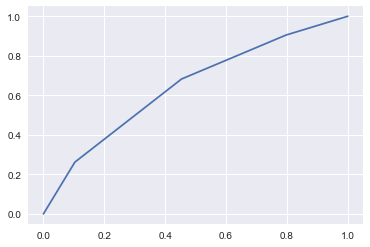

In [82]:
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
lm = LogisticRegression()
lm.fit(df_new[["prestige_1.0", "prestige_2.0", "prestige_3.0"]], df_new['admit'])
feature_set = df_new[["prestige_1.0", "prestige_2.0", "prestige_3.0"]]
actuals = lm.predict(feature_set) 
probas = lm.predict_proba(feature_set)
plt.plot(roc_curve(df_new[['admit']], probas[:,1])[0], roc_curve(df_new[['admit']], probas[:,1])[1])

In [83]:
from sklearn.metrics import classification_report
print classification_report(df_new['admit'], lm.predict(feature_set), target_names=['admitted', 'not-admitted'])

              precision    recall  f1-score   support

    admitted       0.72      0.90      0.80       271
not-admitted       0.54      0.26      0.35       126

 avg / total       0.67      0.70      0.66       397



## Knowledge Review Questions

1. What is test error and train error?
2. What are ways to mitigate a situation where you have low train error but high test error?
3. What are some of the parameters you can tweak to get a better fit in ordinary linear regression?
4. What package would you use to explore these parameters easily and find the best model?
5. What is the difference between Lasso and Ridge regression?
    6a. When do you use which?
6. Bonus: Explore alternatives to dropping obervations with missing data

Advanced Bonus:
1. What makes Lasso regression do what it does to the coefficients?
2. How do you deal with multi-colinearity when performing linear regression?
3. What is the "distance" formula in KNN? I.e. how does KNN account for distance to the k neighbours when predicting the class?

Answers:

1. Train error = error we get when training our models; test error = error we get when testing a model on the test/untrained dataset. 
2. Low train error with high test error using means that we're overfitting. One way of mitigating the situation is by applying regularization (Lasso/Ridge) to penalize not-so-important features. Another common method is cross validation. 
3. A couple of parameters in grid search could be tweaked, such as fit_intercept: T/F, normalize: T/F, scoring: r2, mean_square_error, neg_median_absolute_error, etc.
4. grid_search from sklearn. 
5. Lasso takes coefficients down to zero, which is helpful when there is colinearity in the model data and also when there are two many variables/features. Ridge helps with improving R-squared but does not zero out coefficients. Personally I'd use Lasso for selecting features first and then compare the R-squared of both models to decide which one to use. 
6. Replacing missing values with "NA" for string variables or "0" for continuous variables using df.fillna(). Method includes pad and bfill. 